In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib as mpl
from scipy import interpolate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
os.environ["OMP_NUM_THREADS"] = '1'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config Completer.use_jedi = False
%config InlineBackend.figure_format = 'retina'

In [4]:
water = pd.read_csv('C:\\k_digital\\source\\mygit\\ML-First-Project\\water_preprocessing.csv')

In [5]:
water_test = pd.read_csv('C:\\k_digital\\source\\mygit\\ML-First-Project\\data_ts_city.csv')

In [6]:
water_test['target'] = water_test['구미 혁신도시배수지 유출유량 적산차']
water_test = water_test.drop('구미 혁신도시배수지 유출유량 적산차', axis=1)

In [7]:
water_test

,datetime,target
0,2021-01-01 00:00:00,106.0
1,2021-01-01 01:00:00,184.0
2,2021-01-01 02:00:00,277.0
3,2021-01-01 03:00:00,197.0
4,2021-01-01 04:00:00,72.0
...,...,...
8419,2021-12-17 19:00:00,327.0
8420,2021-12-17 20:00:00,513.0
8421,2021-12-17 21:00:00,396.0
8422,2021-12-17 22:00:00,350.0


In [8]:
water

,datetime,target
0,2017-01-01 01:00,138.0
1,2017-01-01 02:00,237.0
2,2017-01-01 03:00,128.0
3,2017-01-01 04:00,14.0
4,2017-01-01 05:00,11.0
...,...,...
35058,2020-12-31 19:00,328.0
35059,2020-12-31 20:00,347.0
35060,2020-12-31 21:00,335.0
35061,2020-12-31 22:00,141.0


In [9]:
water['datetime'] = water['datetime'].astype('datetime64[ns]')

In [10]:
water_test['datetime'] = water_test['datetime'].astype('datetime64[ns]')

In [11]:
water_test = water_test.set_index('datetime')

In [12]:
water = water.set_index('datetime')
water

,target
datetime,
2017-01-01 01:00:00,138.0
2017-01-01 02:00:00,237.0
2017-01-01 03:00:00,128.0
2017-01-01 04:00:00,14.0
2017-01-01 05:00:00,11.0
...,...
2020-12-31 19:00:00,328.0
2020-12-31 20:00:00,347.0
2020-12-31 21:00:00,335.0


In [13]:
water_test.index = water_test.index.to_period('h')

In [14]:
water.index = water.index.to_period('h')

In [15]:
water.sort_values(by='target', ascending=False).head()

,target
datetime,
2019-12-23 15:00,1274.0
2019-12-23 16:00,1154.0
2020-05-31 12:00,962.0
2020-09-03 22:00,942.0
2019-09-25 10:00,910.0


In [16]:
water_test.sort_values(by='target', ascending=False).head()

,target
datetime,
2021-03-04 14:00,1350.0
2021-10-19 10:00,1007.0
2021-01-30 21:00,1000.0
2021-10-06 18:00,972.0
2021-10-18 10:00,945.0


In [17]:
water_test.target = water_test.target.round(0)

In [18]:
water.target = water.target.round(0)

<AxesSubplot:xlabel='datetime'>

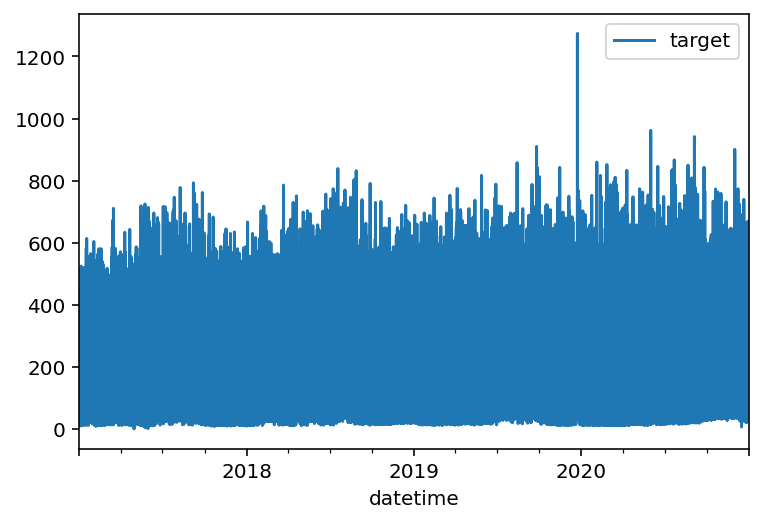

In [19]:
water.plot()

<AxesSubplot:xlabel='datetime'>

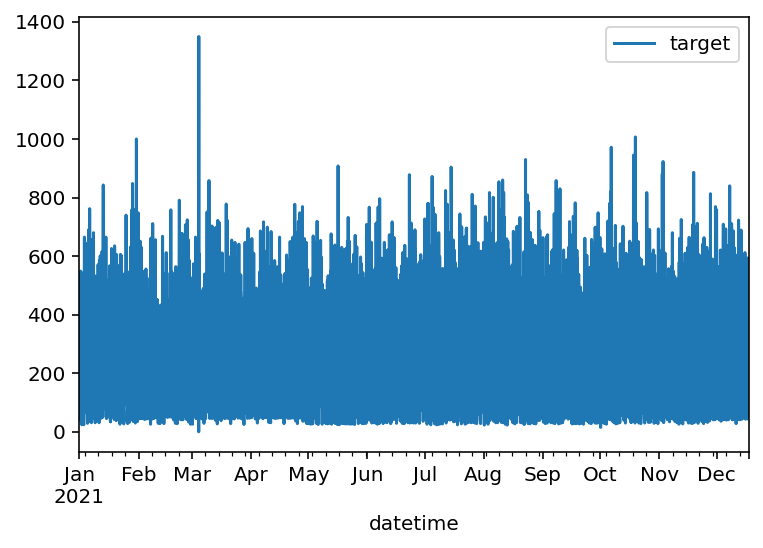

In [20]:
water_test.plot()

<AxesSubplot:xlabel='datetime'>

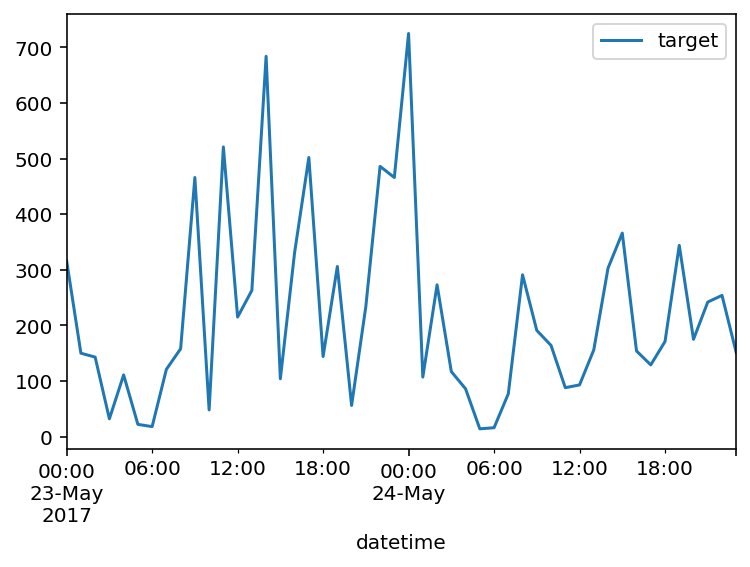

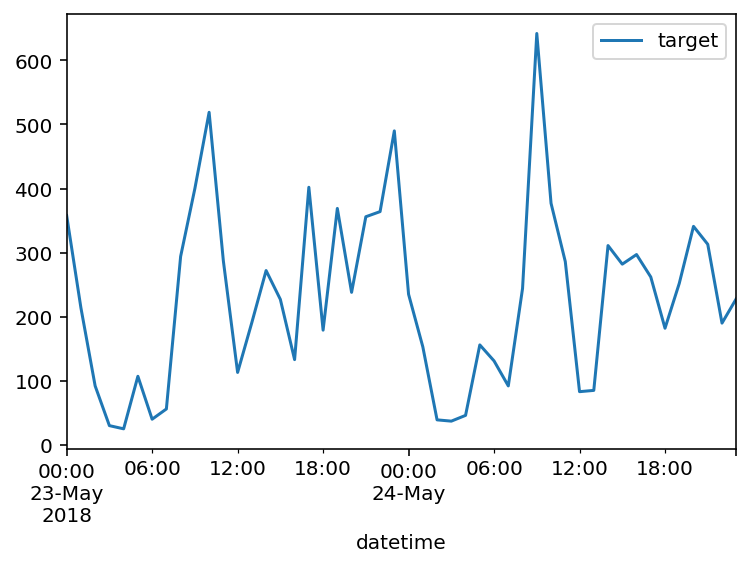

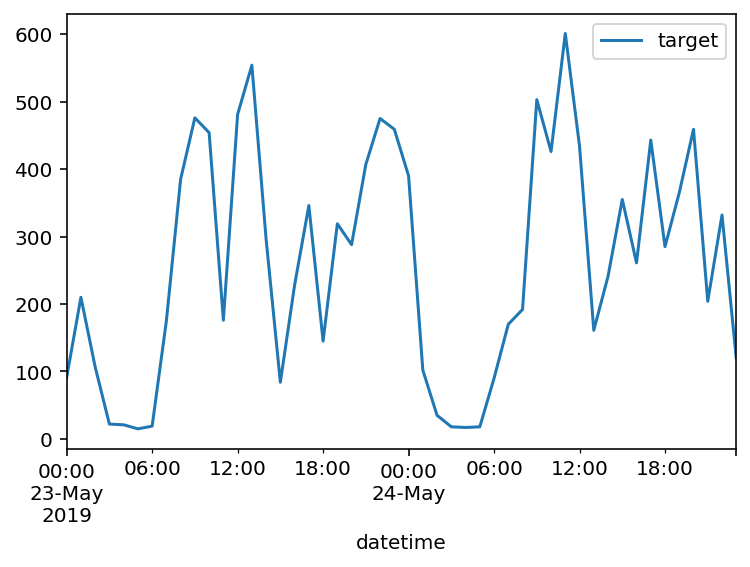

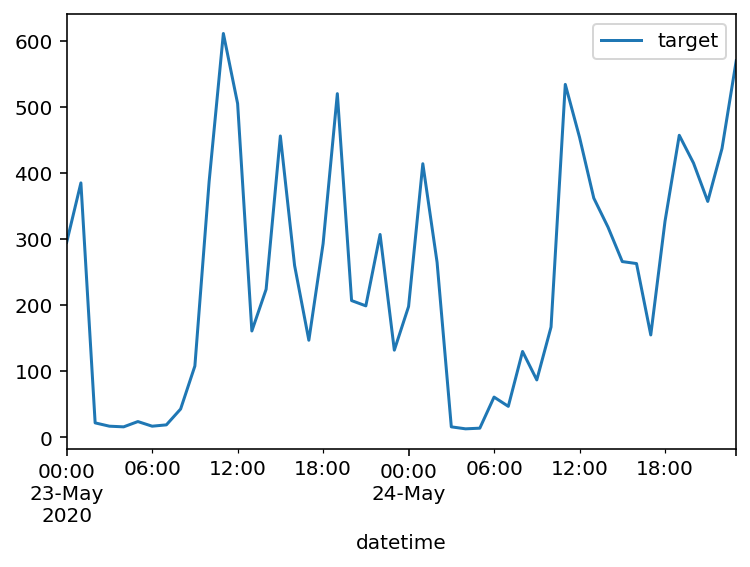

In [21]:
# 시각화
water[(water.index.year == 2017) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day <= 24)].plot()
water[(water.index.year == 2018) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day <= 24)].plot()
water[(water.index.year == 2019) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day <= 24)].plot()
water[(water.index.year == 2020) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day <= 24)].plot()

In [22]:
water.target.isna().sum()

0

# SKTIME 설치

In [23]:
import warnings

import numpy as np
import pandas as pd

# hide warnings
warnings.filterwarnings("ignore")

In [24]:
# 넘파이 버전 낮추기
!pip install numpy==1.20.3

In [25]:
print(np.__version__)

1.20.3


In [26]:
## conda prompt 에 설치
## conda install -c conda-forge sktime

In [27]:
## python -m pip install --user scikit-image (--user 형식 활용)

In [28]:
import  scipy.signal.signaltools
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

In [29]:
from sktime.forecasting.base import ForecastingHorizon

In [30]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [31]:
from sktime.utils.datetime import _coerce_duration_to_int
from sktime.utils.validation import (
    array_is_int,
    array_is_timedelta_or_date_offset,
    is_array,
    is_int,
    is_timedelta_or_date_offset,
)
from sktime.utils.validation.series import (
    VALID_INDEX_TYPES,
    is_in_valid_absolute_index_types,
    is_in_valid_index_types,
    is_in_valid_relative_index_types,
    is_integer_index,
)

In [ ]:
# from sktime.forecasting.all import *

# y = water[(water.index.year == 2020)]
# y_train, y_test = temporal_train_test_split(y)
# fh = ForecastingHorizon(y_test.index, is_relative=False)
# forecaster = ThetaForecaster(sp=24)  # monthly seasonal periodicity
# forecaster.fit(y_train)
# y_pred = forecaster.predict(fh)

In [60]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

In [61]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

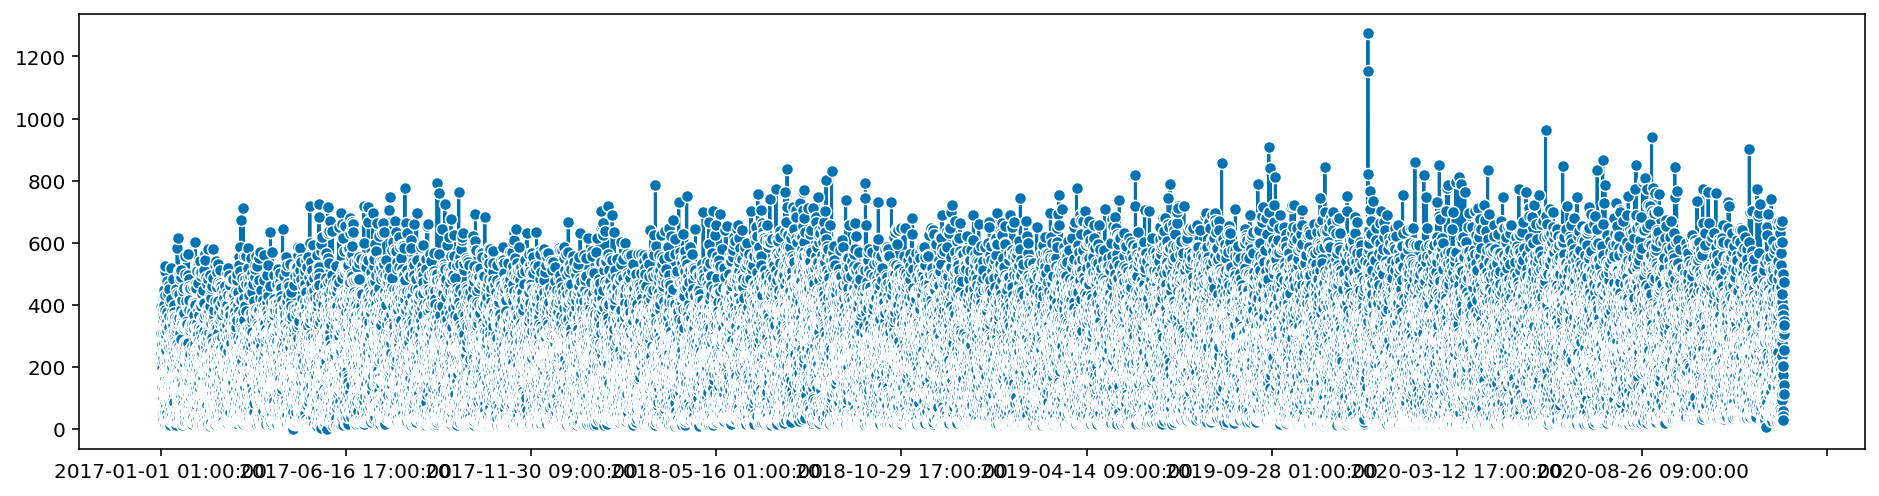

In [62]:
# plotting for visualization
plot_series(water)

## SKTIME 예측

In [34]:
from sktime.datasets import load_airline
from sktime.forecasting.theta import ThetaForecaster

In [67]:
fh = ForecastingHorizon(water_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)
forecaster.fit(water)
pred = forecaster.predict(fh)

In [68]:
pred.head()

,target
datetime,
2021-01-01 00:00,134.657566
2021-01-01 01:00,112.566301
2021-01-01 02:00,93.380722
2021-01-01 03:00,73.890583
2021-01-01 04:00,62.084675


In [69]:
water_test.head()

,target
datetime,
2021-01-01 00:00,106.0
2021-01-01 01:00,184.0
2021-01-01 02:00,277.0
2021-01-01 03:00,197.0
2021-01-01 04:00,72.0


In [164]:
pred.to_excel('pred_test.xlsx')

## 평가

In [58]:
fh = ForecastingHorizon(water_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)
forecaster.fit(water)
pred = forecaster.predict(fh)

In [72]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(water_test, pred)

162.85145801467246

In [73]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(water_test, pred)

162.85145801467246

In [74]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mean_absolute_percentage_error(water_test, pred, symmetric=False)

60921433208832.06

In [65]:
fh = ForecastingHorizon(water_test.index, is_relative=False)
forecaster48 = ThetaForecaster(sp=48)
forecaster48.fit(water)
pred = forecaster24.predict(fh)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [66]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(water_test, pred)

94.04467519098299

In [75]:
fh = ForecastingHorizon(water_test.index, is_relative=False)
forecaster24 = ThetaForecaster(sp=24)
forecaster24.fit(water)
pred = forecaster24.predict(fh)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [76]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(water_test, pred)

94.12588398670981

In [86]:
water_test.index[:336]

PeriodIndex(['2021-01-01 00:00', '2021-01-01 01:00', '2021-01-01 02:00',
             '2021-01-01 03:00', '2021-01-01 04:00', '2021-01-01 05:00',
             '2021-01-01 06:00', '2021-01-01 07:00', '2021-01-01 08:00',
             '2021-01-01 09:00',
             ...
             '2021-01-14 14:00', '2021-01-14 15:00', '2021-01-14 16:00',
             '2021-01-14 17:00', '2021-01-14 18:00', '2021-01-14 19:00',
             '2021-01-14 20:00', '2021-01-14 21:00', '2021-01-14 22:00',
             '2021-01-14 23:00'],
            dtype='period[H]', name='datetime', length=336)

In [128]:
water_2020 = water[water.index.year == 2020]

In [136]:
water_2019 = water[water.index.year == 2019]

In [129]:
## 2020년만 훈련시키기

## sp = 24 : 96.64173187350828
## sp = 48 : 97.1992917834147

In [134]:
fh = ForecastingHorizon(water_test.index[:336], is_relative=False)
forecaster24 = ThetaForecaster(sp=24)
forecaster24.fit(water_2020)
pred = forecaster24.predict(fh)

In [135]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(water_test[:336], pred)

96.64173187350828

In [129]:
## 2019년만 훈련시키기

## sp = 24 : 103.23298019412543
## sp = 48 : 105.1350489151113

In [160]:
fh = ForecastingHorizon(water_test.index, is_relative=False)
forecaster24 = ThetaForecaster(sp=48)
forecaster24.fit(water_2019)
pred = forecaster24.predict(fh)

In [162]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(water_test, pred)

97.9097297391204

## 결과 시각화

In [100]:
# water_test.index[:336]
## sp = 12 : 155.73095093858362
## sp = 72 : 98.17990126460985
## sp = 168 : 95.37990126460985
## sp = 720 : 100.86047318816215
## sp = 8640 : 127.71912357502481

In [113]:
fh = ForecastingHorizon(water_test.index[:336], is_relative=False)
forecaster24 = ThetaForecaster(sp=24)
forecaster24.fit(water)
pred = forecaster24.predict(fh)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [114]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(water_test[:336], pred)

98.23220791014843

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

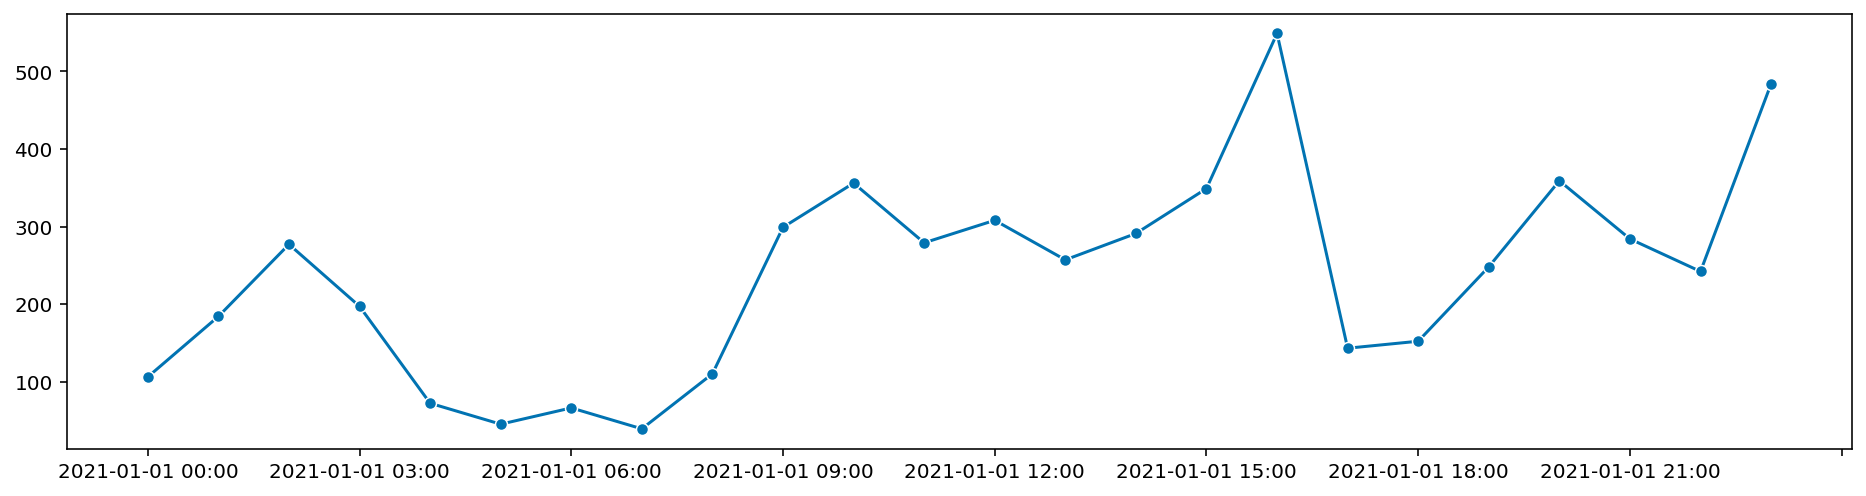

In [115]:
plot_series(water_test.head(24))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

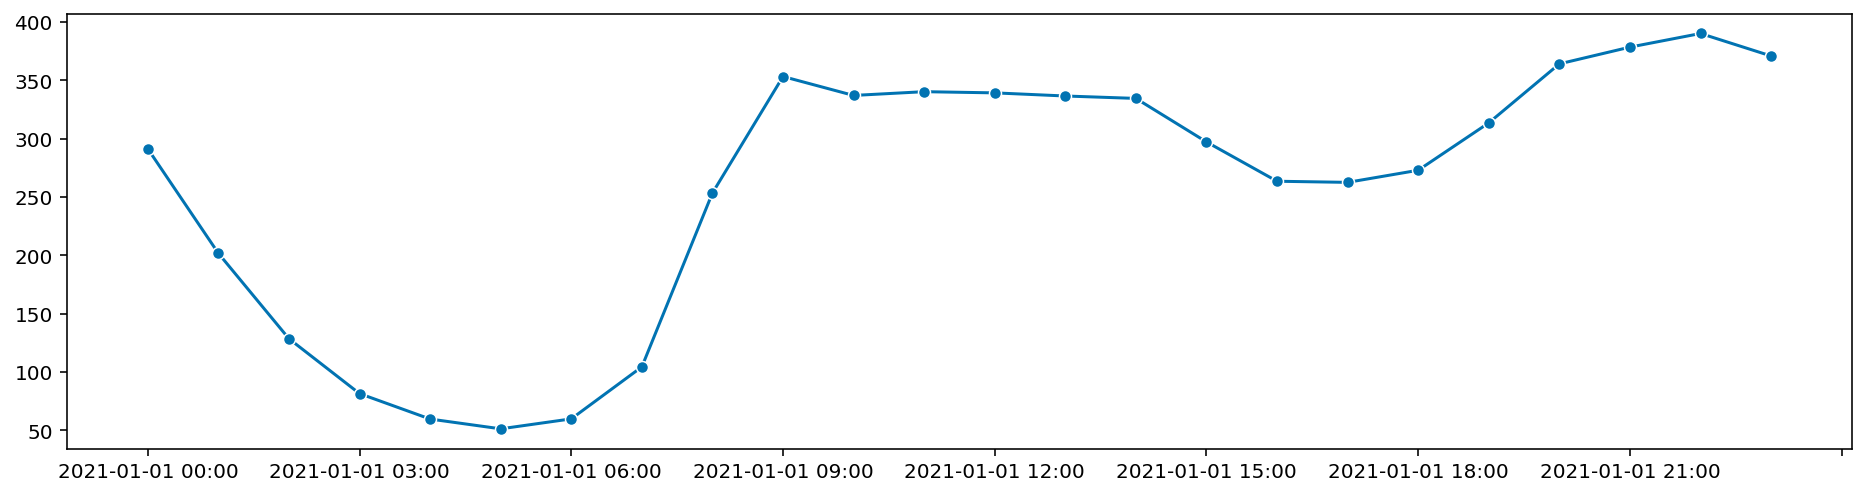

In [116]:
plot_series(pred.head(24))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

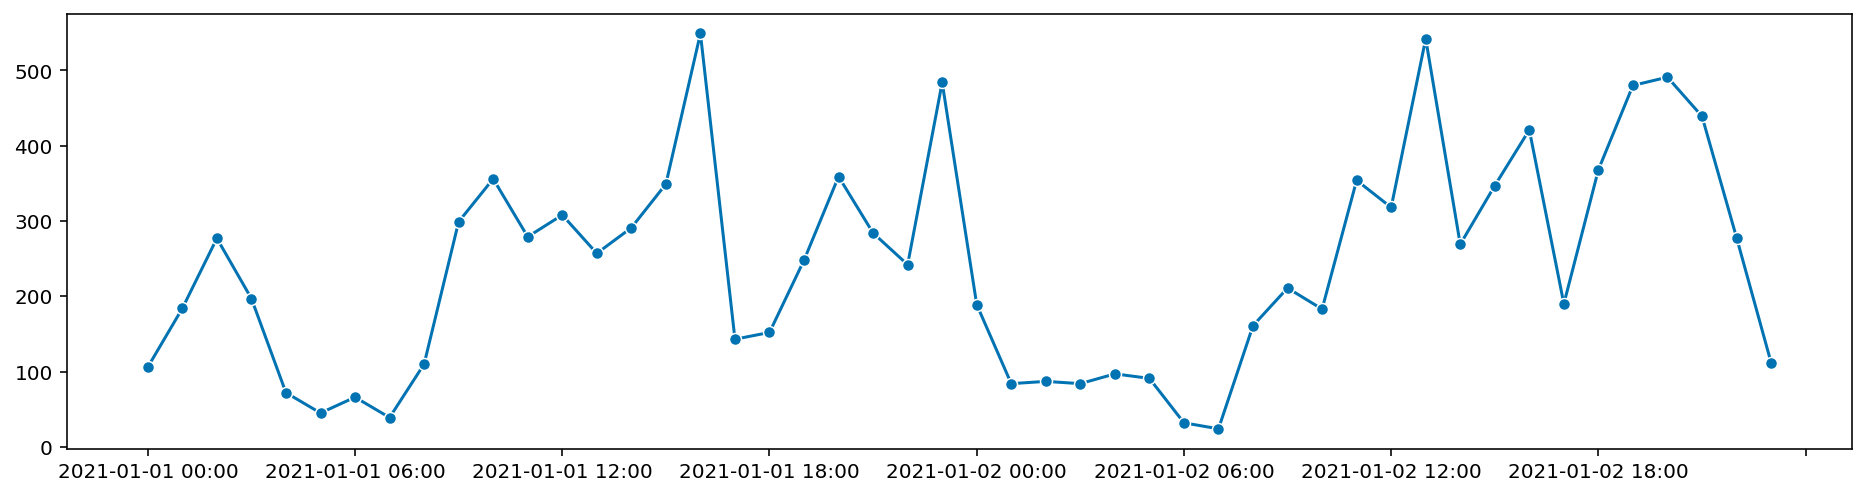

In [44]:
plot_series(water_test.head(48))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

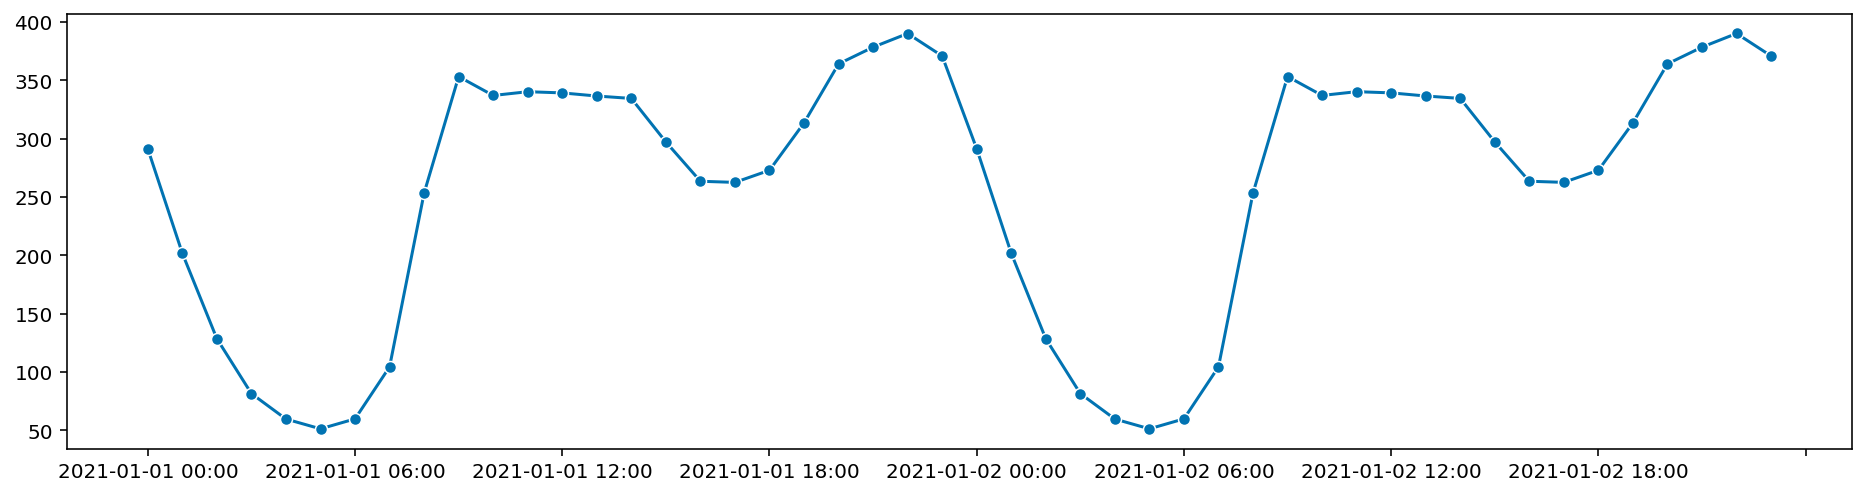

In [45]:
plot_series(pred.head(48))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

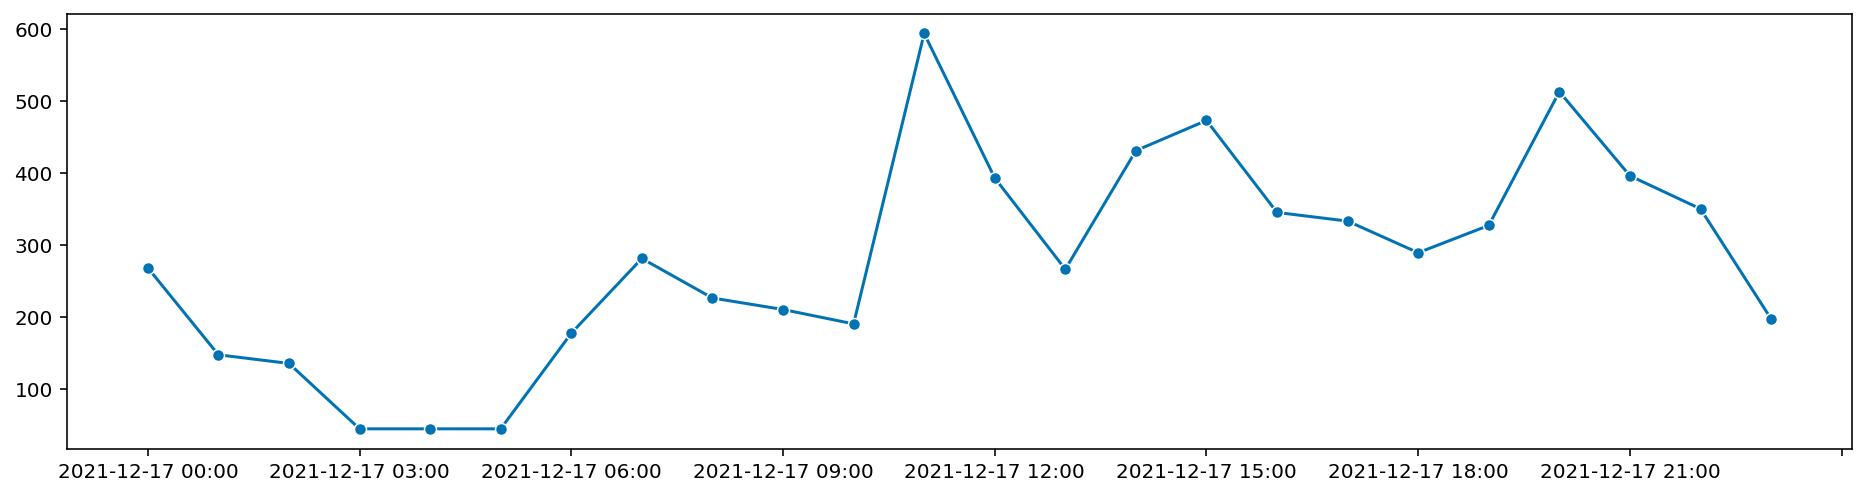

In [46]:
plot_series(water_test.tail(24))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

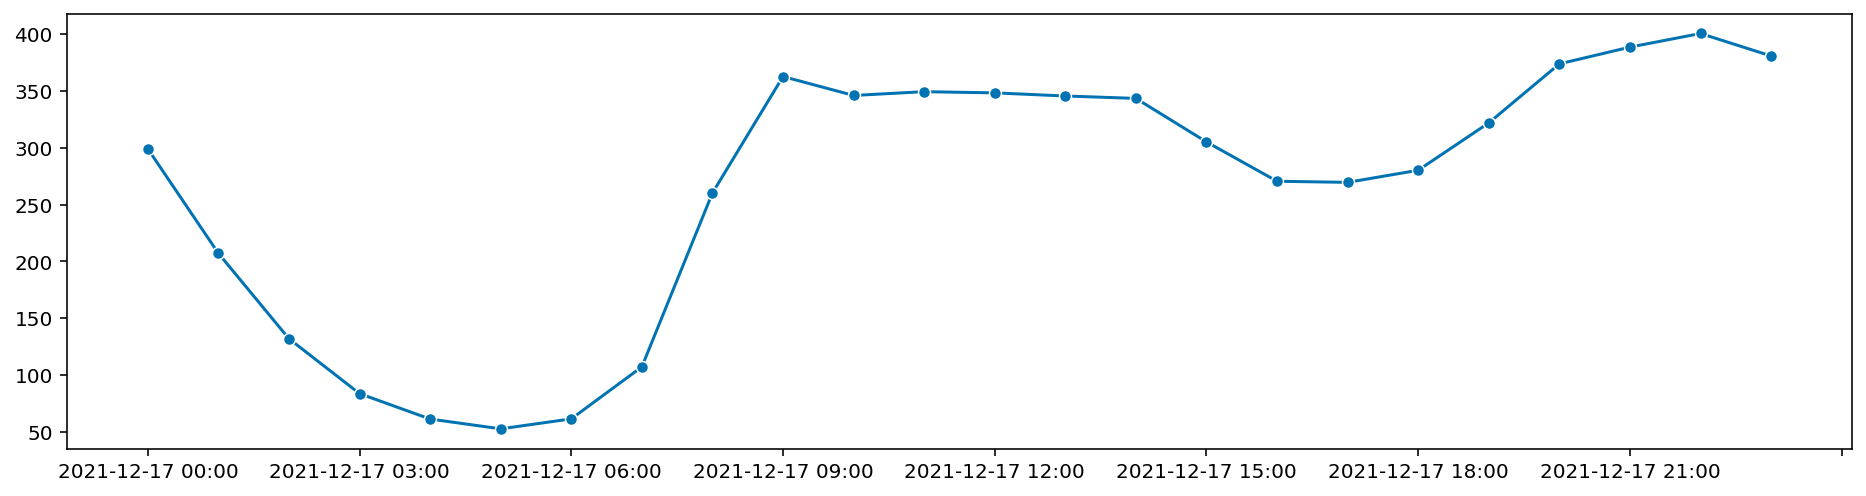

In [47]:
plot_series(pred.tail(24))

In [80]:
water_test.index

PeriodIndex(['2021-01-01 00:00', '2021-01-01 01:00', '2021-01-01 02:00',
             '2021-01-01 03:00', '2021-01-01 04:00', '2021-01-01 05:00',
             '2021-01-01 06:00', '2021-01-01 07:00', '2021-01-01 08:00',
             '2021-01-01 09:00',
             ...
             '2021-12-17 14:00', '2021-12-17 15:00', '2021-12-17 16:00',
             '2021-12-17 17:00', '2021-12-17 18:00', '2021-12-17 19:00',
             '2021-12-17 20:00', '2021-12-17 21:00', '2021-12-17 22:00',
             '2021-12-17 23:00'],
            dtype='period[H]', name='datetime', length=8424)

In [158]:
fh = ForecastingHorizon(water_test.index, is_relative=False)
forecaster48 = ThetaForecaster(sp=48)
forecaster48.fit(water)
pred = forecaster48.predict(fh)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## 앙상블(과대적합)

In [159]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(water_test, pred)

94.04467519098299

In [181]:
from sktime.forecasting.online_learning import NormalHedgeEnsemble

In [182]:
from sktime.forecasting.online_learning import OnlineEnsembleForecaster

In [146]:
hedge_expert = NormalHedgeEnsemble(n_estimators=3, loss_func=mean_squared_error)

NameError: name 'mean_squared_error' is not defined

In [148]:
from sktime.forecasting.compose import EnsembleForecaster

In [150]:
from sktime.forecasting.compose import MultiplexForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

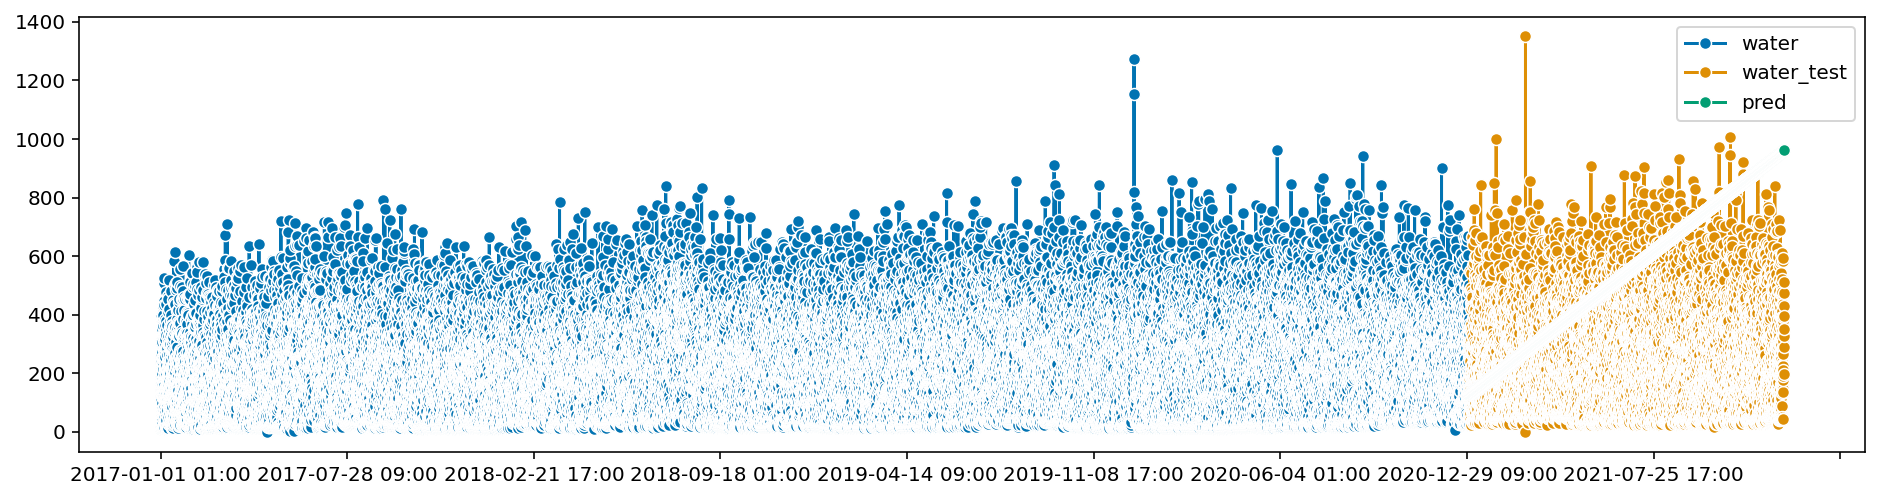

In [197]:
ses = ExponentialSmoothing(sp=24)
holt = ExponentialSmoothing(trend="add", damped_trend=False, sp=24)

forecaster = EnsembleForecaster(
    [
        ("ses", ses),
        ("holt", holt)     
    ]
)
forecaster.fit(y = water)
pred = forecaster.predict(fh)
plot_series(water, water_test, pred, labels=["water", "water_test", "pred"])

In [198]:
hedge_expert = NormalHedgeEnsemble(n_estimators=2, 
                                   =mean_absolute_error)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

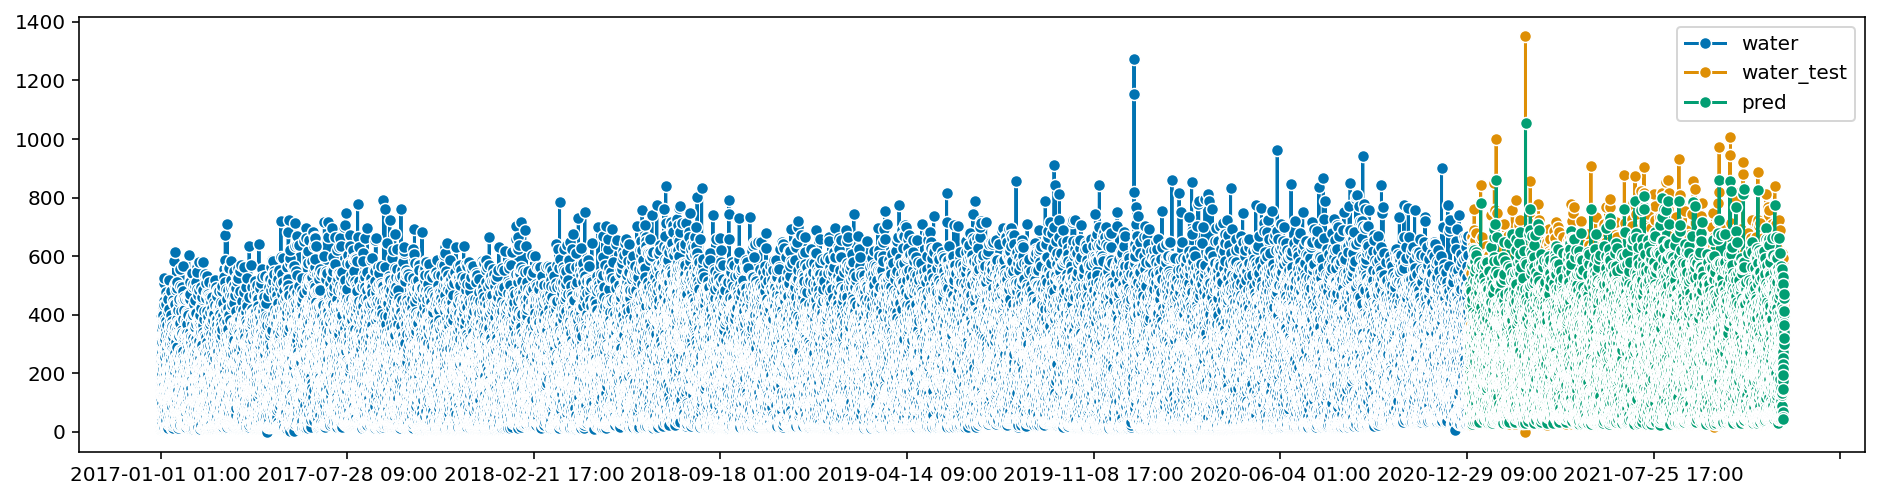

In [200]:
forecaster = OnlineEnsembleForecaster(
    [
        ("ses", ses),
        ("holt", holt)
    ],
    ensemble_algorithm=hedge_expert,
)

forecaster.fit(y=water, fh=fh)
pred = forecaster.update_predict_single(water_test)
plot_series(water, water_test, pred, labels=["water", "water_test", "pred"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

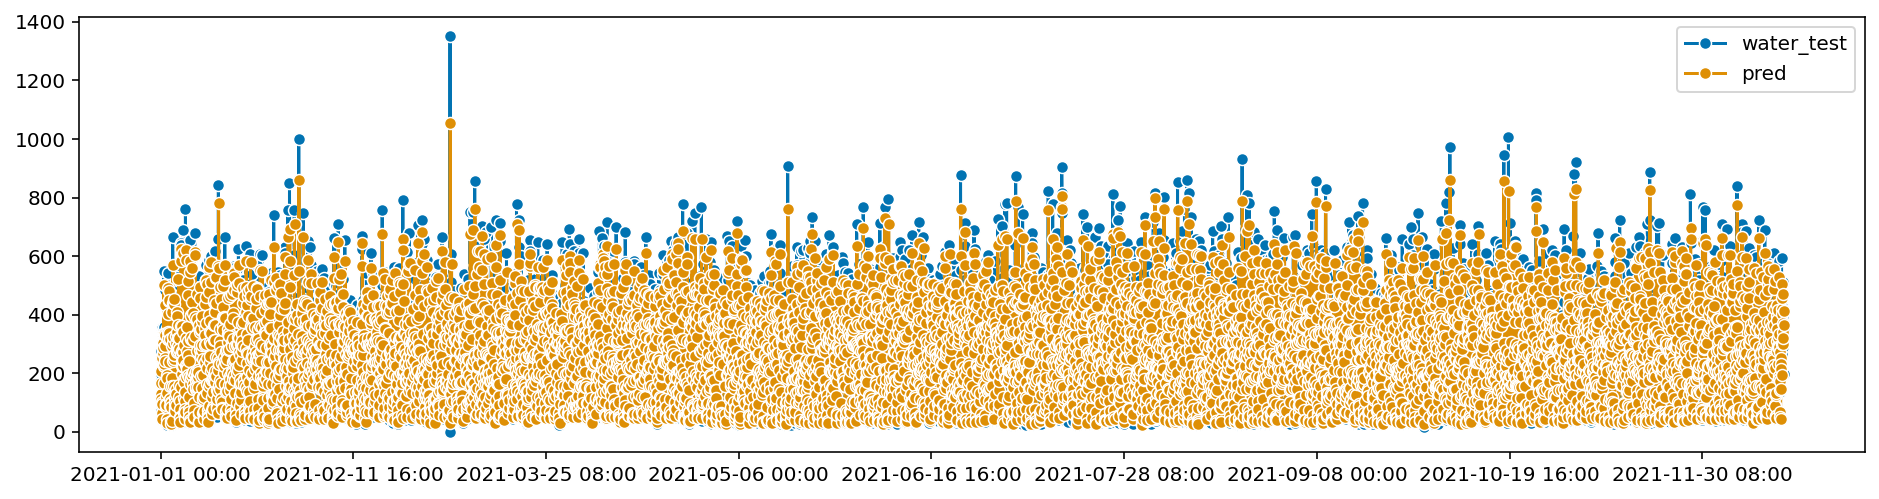

In [191]:
plot_series( water_test, pred, labels=[ "water_test", "pred"])

In [169]:
water_test.head()

,target
2021-01-01 00:00,106.0
2021-01-01 01:00,184.0
2021-01-01 02:00,277.0
2021-01-01 03:00,197.0
2021-01-01 04:00,72.0


In [170]:
pred.head()

,target
2021-01-01 00:00,127.860319
2021-01-01 01:00,127.922103
2021-01-01 02:00,127.983929
2021-01-01 03:00,128.045797
2021-01-01 04:00,128.107706


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

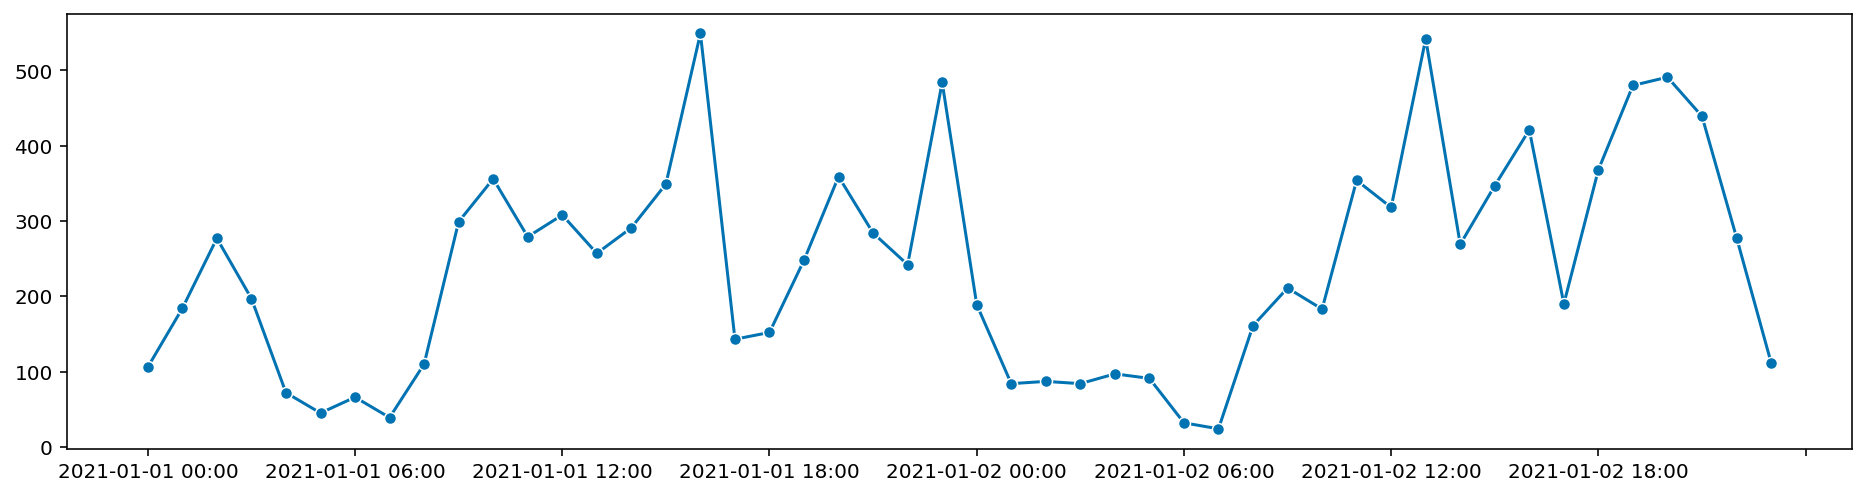

In [201]:
plot_series(water_test.head(48))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

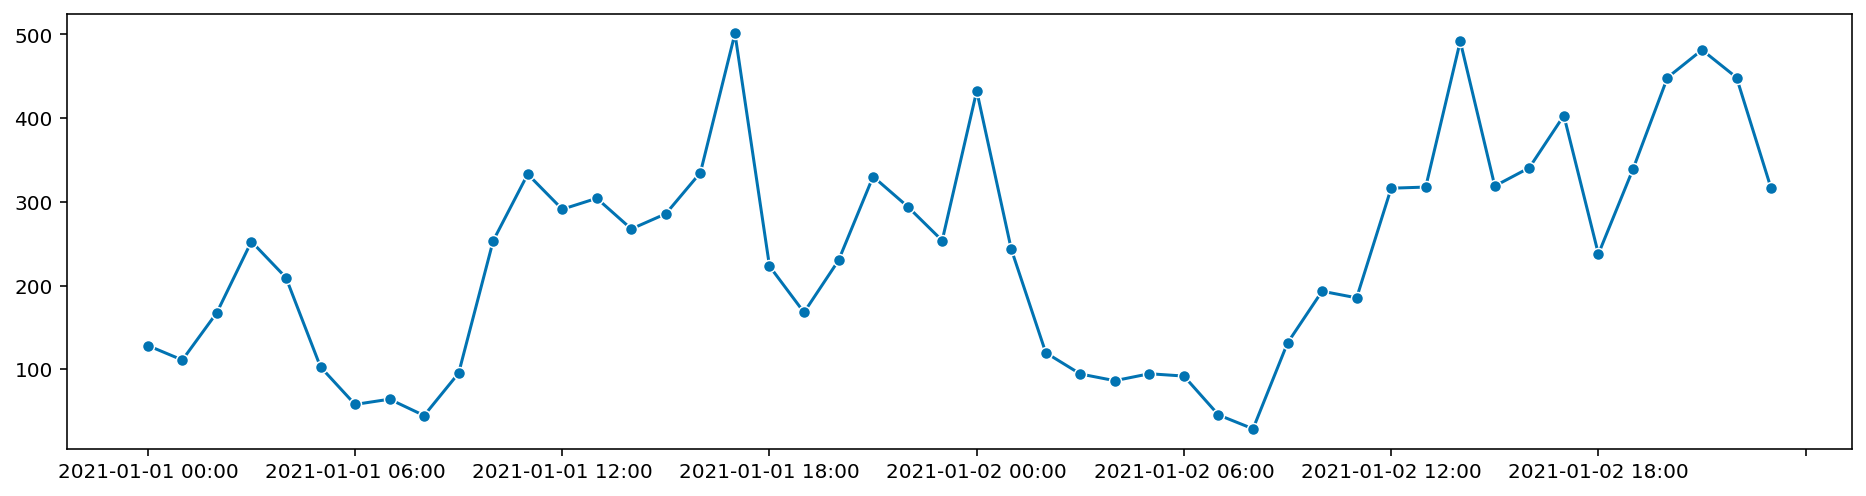

In [202]:
plot_series(pred.head(48))

In [188]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(water_test, pred)

115.3338089292623

In [192]:
from sklearn.metrics import mean_squared_error
mean_squared_error(water_test, pred)

24200.658508287423

In [177]:
forecaster = OnlineEnsembleForecaster(
    [
        ("ses", ses),
        ("holt", holt),
        ("damped", damped),
    ],
    ensemble_algorithm=hedge_expert,
)

forecaster.fit(y=y_train, fh=fh)
y_pred = forecaster.update_predict_single(y_test)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

NameError: name 'hedge_expert' is not defined